<a href="https://colab.research.google.com/github/KARTHIKEYANC04052002/Covid_Cases_In_India/blob/main/Covid_Cases_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
from pytz import timezone
date_time = datetime.now(timezone('Asia/Kolkata'))
datetime.strftime(date_time, "STATUS AS OF %Y %B %d  %I:%M:%S %p")

'STATUS AS OF 2021 June 22  11:06:32 PM'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://api.covid19india.org/state_district_wise.json"

In [4]:
raw_df = pd.read_json(url).T

In [5]:
covid_df = pd.DataFrame()

In [6]:
for i in raw_df.itertuples():
  temp_df = pd.DataFrame(i[1]).T
  temp_df['State'] = i[0]
  if covid_df.shape[0] > 0: covid_df = covid_df.append(temp_df)
  else: covid_df = temp_df

In [7]:
covid_states_df = covid_df.groupby('State').sum()

In [8]:
covid_states_df

,active,confirmed,deceased,migratedother,notes,recovered
State,,,,,,
Andaman and Nicobar Islands,103,7425,127,0,District-wise numbers are out-dated as cumulat...,7195
Andhra Pradesh,53880,1857352,12416,0,,1791056
Arunachal Pradesh,2548,33664,160,0,,30956
Assam,24012,488179,4280,1347,,450924
Bihar,2810,720207,9563,1,,707833
Chandigarh,278,61467,806,0,,60383
Chhattisgarh,8007,991653,13402,0,,970244
Dadra and Nagar Haveli and Daman and Diu,62,10521,4,33,,10422
Delhi,1918,1432778,24933,0,District-wise numbers are out-dated as cumulat...,1405927


In [ ]:
!pip install geopandas

In [10]:
import geopandas as gpd

In [11]:
india_map_df = pd.read_csv("https://raw.githubusercontent.com/KARTHIKEYANC04052002/Covid_Cases_In_India/main/Maps/India_States.csv")

In [12]:
india_map_df = gpd.GeoDataFrame(india_map_df)
india_map_df['geometry'] = gpd.GeoSeries.from_wkt(india_map_df['geometry'])

In [13]:
india_map_df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
covid_states_df['state_name'] = covid_states_df.index
covid_states_df = covid_states_df[(covid_states_df['state_name'] != 'Ladakh') & (covid_states_df['state_name'] != 'State Unassigned')]
covid_states_df = covid_states_df.sort_values('state_name')

In [15]:
merged_df = india_map_df.set_index('st_nm').join(covid_states_df.set_index('state_name'))

In [16]:
Titles = ['Active Covid Cases', 'Confirmed Covid Cases', 'Deceased Covid Cases', 'Recovered Covid Cases']
Columns = ['active', 'confirmed', 'deceased', 'recovered']
CMAPs = ['Reds', 'Oranges', 'Greys', 'Greens']

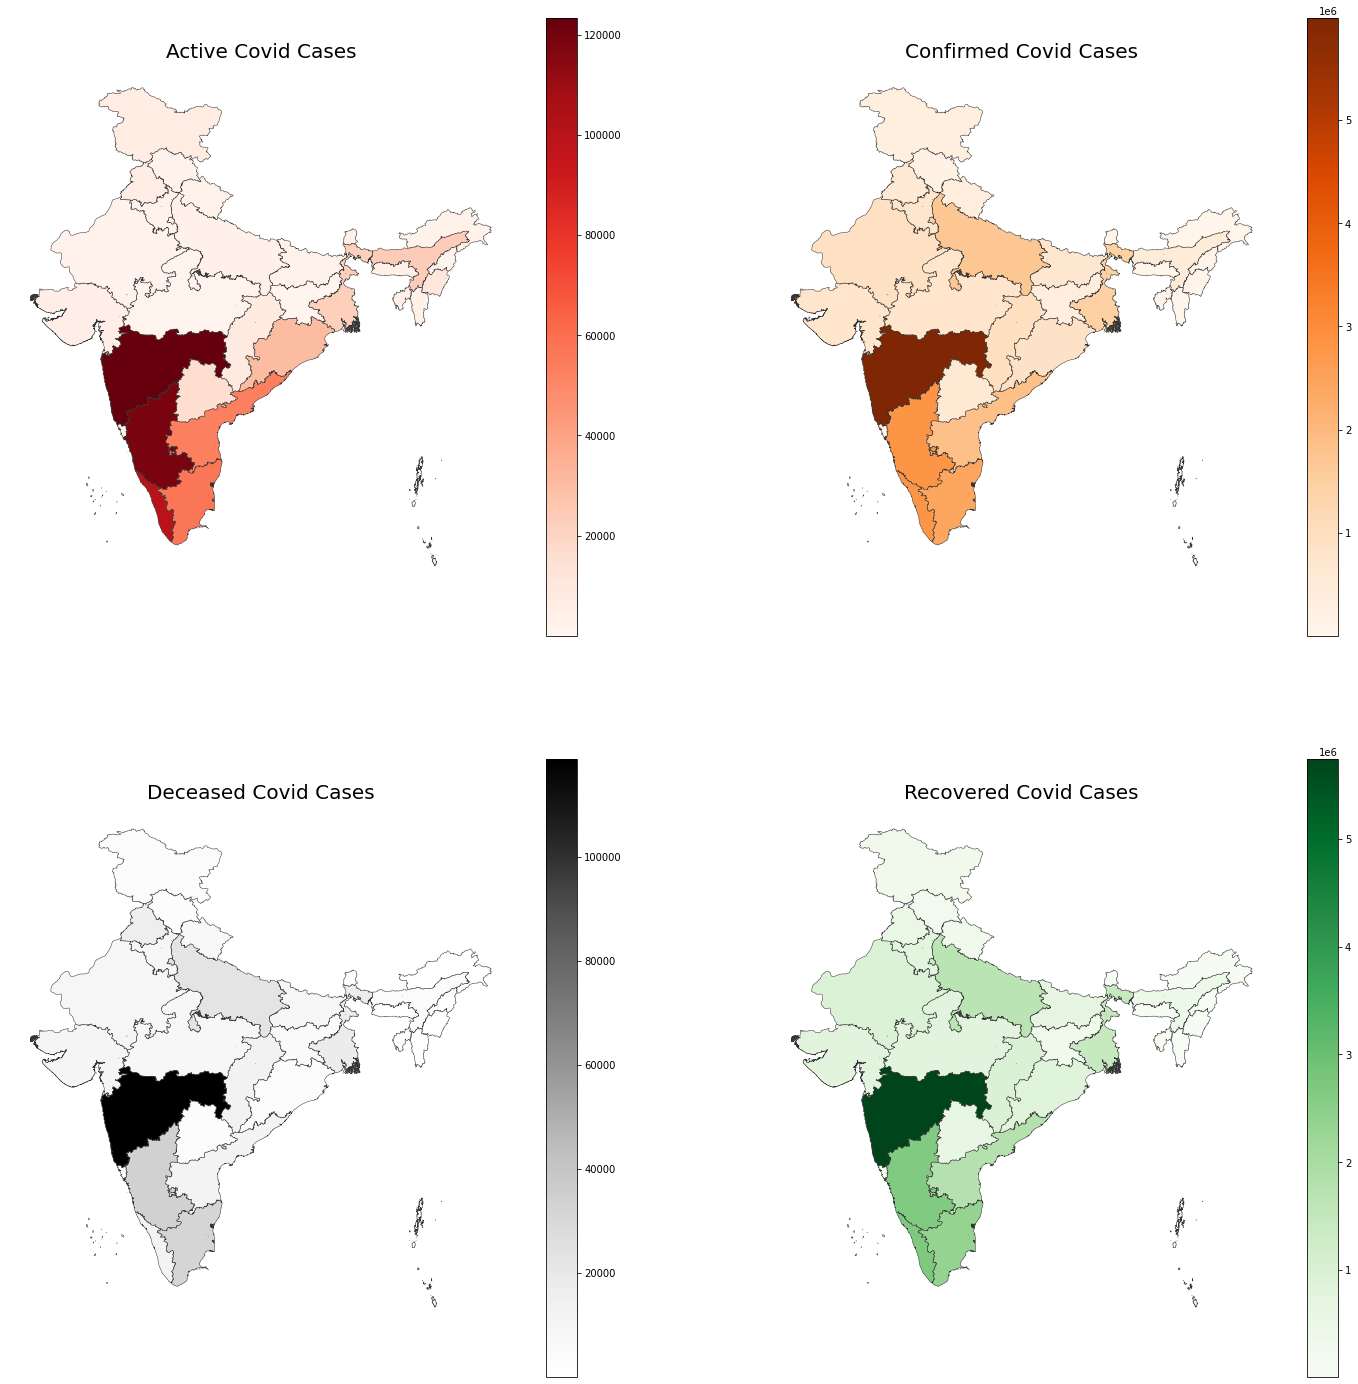

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))
for i in range(4):
  row, col = i // 2, i % 2
  axs[row, col].axis('off')
  axs[row, col].set_title(Titles[i], fontdict={'fontsize': '20', 'fontweight' : '5'})
  merged_df.plot(column=Columns[i], cmap=CMAPs[i], linewidth=0.5, ax=axs[row, col], edgecolor='0.2', legend=True)